<h1><center><font color = 'RED'> ETL - Case Americanas 

In [1]:
import pandas as pd 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#### Tratamento Base Vendas

In [2]:
df = pd.read_excel("CaseAmericanas.xlsx", sheet_name = "Base Venda")

In [3]:
df.sample(10)

,Ano,Mês,Departamento,Canal,Marca,Origem Tráfego,MDP,Parcelamento,Receita,Pedidos
24372,2022,4,INSTRUMENTOS MUSICAIS,3P,SUBA,AFILIADOS,PIX,A VISTA,2.503007e+03,4.041684
64201,2022,1,ELETROPORTÃTEIS,1P,SUBA,BUSCA PPC,BOLETO,A VISTA,6.131950e+04,196.819259
38513,2021,6,CLIMATIZAÇÃO,3P,SHOP,BUSCA ORGANICA,BOLETO,A VISTA,4.474647e+04,33.406104
41071,2021,2,CLIMATIZAÇÃO,3P,ACOM,COMPARADORES,AME,A VISTA,4.946950e+05,303.082858
51828,2020,1,ELETRODOMESTICOS,1P,SHOP,AFILIADOS,CARTAO,A VISTA,4.677795e+04,37.401846
49371,2020,2,ELETRODOMESTICOS,3P,ACOM,AFILIADOS,CARTAO,A VISTA,1.129558e+06,962.644479
29144,2020,5,UTILIDADES DOMESTICAS,1P,SUBA,COMPARADORES,CARTAO,A VISTA,6.173696e+03,20.832232
39781,2020,3,CLIMATIZAÇÃO,3P,SHOP,AFILIADOS,CARTAO,A PRAZO,1.727290e+05,116.571131
5806,2020,2,TELEFONIA,3P,SHOP,COMPARADORES,BOLETO,A VISTA,3.707945e+04,93.590057
9619,2021,4,ELETRONICOS,3P,SHOP,COMPARADORES,CARTAO,A PRAZO,2.603722e+04,48.325362


In [4]:
df.isnull().sum()

Ano               0
Mês               0
Departamento      0
Canal             0
Marca             0
Origem Tráfego    0
MDP               0
Parcelamento      0
Receita           0
Pedidos           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68761 entries, 0 to 68760
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ano             68761 non-null  int64  
 1   Mês             68761 non-null  int64  
 2   Departamento    68761 non-null  object 
 3   Canal           68761 non-null  object 
 4   Marca           68761 non-null  object 
 5   Origem Tráfego  68761 non-null  object 
 6   MDP             68761 non-null  object 
 7   Parcelamento    68761 non-null  object 
 8   Receita         68761 non-null  float64
 9   Pedidos         68761 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 5.2+ MB


In [6]:
#Alterando os tipo de dados
df['Ano'] = df['Ano'].astype(str)
df['Mês'] = df['Mês'].astype(str)
#df['Pedidos'] = round(df['Pedidos'])
#df['Pedidos'] = df['Pedidos'].astype('int64')

In [7]:
#Crianda Coluna Mês/Ano
df['Mês/Ano'] = df['Mês'].str.cat(df['Ano'],sep="/")
#Transformando o Tipo para DateTime 
#df['Mês/Ano'] = list(map(lambda x:datetime.strptime(x, "%m/%Y").date(),df['Mês/Ano']))
#Eliminando a Colunas Ano e Mês
df.drop(["Ano", "Mês"], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68761 entries, 0 to 68760
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Departamento    68761 non-null  object 
 1   Canal           68761 non-null  object 
 2   Marca           68761 non-null  object 
 3   Origem Tráfego  68761 non-null  object 
 4   MDP             68761 non-null  object 
 5   Parcelamento    68761 non-null  object 
 6   Receita         68761 non-null  float64
 7   Pedidos         68761 non-null  float64
 8   Mês/Ano         68761 non-null  object 
dtypes: float64(2), object(7)
memory usage: 4.7+ MB


In [9]:
#Nova Estrutura
df.sample(10)

,Departamento,Canal,Marca,Origem Tráfego,MDP,Parcelamento,Receita,Pedidos,Mês/Ano
5247,TELEFONIA,1P,SHOP,TRAFEGO DIRETO,CARTAO,A VISTA,1.569822e+06,865.890946,5/2021
4454,TELEFONIA,1P,SOUB,TRAFEGO DIRETO,CARTAO,A PRAZO,6.384476e+05,293.095913,1/2022
48998,ELETRODOMESTICOS,1P,ACOM,BUSCA PPC,CARTAO,A VISTA,7.069529e+05,608.416161,4/2020
54478,MÓVEIS,3P,SUBA,COMPARADORES,BOLETO,A VISTA,7.475345e+03,17.347408,4/2021
40887,CLIMATIZAÇÃO,3P,ACOM,TRAFEGO DIRETO,CARTAO,A VISTA,3.601935e+06,1821.760636,10/2021
11819,ELETRONICOS,3P,SOUB,TRAFEGO DIRETO,AME,A VISTA,1.859765e+03,10.250834,4/2021
25610,BELEZA & PERFUMARIA,3P,SOUB,BUSCA PPC,BOLETO,A VISTA,5.732709e+02,3.090942,3/2022
25643,BELEZA & PERFUMARIA,3P,SUBA,BUSCA ORGANICA,PIX,A VISTA,2.978372e+04,184.289917,11/2021
38538,CLIMATIZAÇÃO,1P,ACOM,BUSCA ORGANICA,CARTAO,A PRAZO,1.913083e+05,329.709285,3/2021
46820,PCS,1P,SOUB,TRAFEGO DIRETO,AME,A VISTA,5.247102e+05,199.815948,4/2021


In [10]:
#Departamentos
df['Departamento'].unique()

array(['AUTOMOTIVO', 'TELEFONIA', 'ELETRONICOS', 'ESPORTE & LAZER',
       'CONSOLES & GAMES', 'INSTRUMENTOS MUSICAIS', 'BELEZA & PERFUMARIA',
       'UTILIDADES DOMESTICAS', 'INFORMÁTICA E ACESSÓRIOS',
       'CLIMATIZAÇÃO', 'PCS', 'ELETRODOMESTICOS', 'MÓVEIS', 'PC GAMER',
       'ELETROPORTÃ\x81TEIS', 'MERCADO'], dtype=object)

In [11]:
#Corrigindo Ortografia dos Departamentos
aux = df.index[df.Departamento==df['Departamento'].unique()[2]]
df.loc[aux,'Departamento'] = 'ELETRÔNICOS'
aux = df.index[df.Departamento==df['Departamento'].unique()[7]]
df.loc[aux,'Departamento'] = 'UTILIDADES DOMÉSTICAS'
aux = df.index[df.Departamento==df['Departamento'].unique()[11]]
df.loc[aux,'Departamento'] = 'ELETRODOMÉSTICOS'
aux = df.index[df.Departamento==df['Departamento'].unique()[14]]
df.loc[aux,'Departamento'] = 'ELETROPORTÁTEIS'

In [12]:
df['Departamento'].unique()

array(['AUTOMOTIVO', 'TELEFONIA', 'ELETRÔNICOS', 'ESPORTE & LAZER',
       'CONSOLES & GAMES', 'INSTRUMENTOS MUSICAIS', 'BELEZA & PERFUMARIA',
       'UTILIDADES DOMÉSTICAS', 'INFORMÁTICA E ACESSÓRIOS',
       'CLIMATIZAÇÃO', 'PCS', 'ELETRODOMÉSTICOS', 'MÓVEIS', 'PC GAMER',
       'ELETROPORTÁTEIS', 'MERCADO'], dtype=object)

### Criando Coluna Custo de Parcelamento

In [13]:
df['Parcelamento'].unique()

array(['A PRAZO', 'A VISTA'], dtype=object)

In [14]:
df['Custo Parcelamento']=""

In [15]:
#Perfomar função!!!!
for index in df.index:
    if(df.loc[index,'Parcelamento']=='A VISTA'):
        df.loc[index,'Custo Parcelamento']=0.0
    else:
        df.loc[index,'Custo Parcelamento']=df.loc[index,'Receita'] * 0.005

In [16]:
df['Custo Parcelamento'] = df['Custo Parcelamento'].astype('float64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68761 entries, 0 to 68760
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Departamento        68761 non-null  object 
 1   Canal               68761 non-null  object 
 2   Marca               68761 non-null  object 
 3   Origem Tráfego      68761 non-null  object 
 4   MDP                 68761 non-null  object 
 5   Parcelamento        68761 non-null  object 
 6   Receita             68761 non-null  float64
 7   Pedidos             68761 non-null  float64
 8   Mês/Ano             68761 non-null  object 
 9   Custo Parcelamento  68761 non-null  float64
dtypes: float64(3), object(7)
memory usage: 5.2+ MB


#### Volume de Venda 

In [18]:
df['Volume Venda'] = df['Receita']*df['Pedidos']

In [19]:
ranking_vv = df.groupby(['Departamento']).sum().sort_values(by=['Volume Venda'],ascending=False).head()
ranking_vv

,Receita,Pedidos,Custo Parcelamento,Volume Venda
Departamento,,,,
MERCADO,8.781823e+08,1.843153e+07,1.139572e+06,1.455295e+14
TELEFONIA,8.460592e+09,5.621116e+06,2.114819e+07,1.032166e+14
ELETROPORTÁTEIS,4.081881e+09,1.443810e+07,9.392704e+06,7.713975e+13
ELETRÔNICOS,7.195411e+09,4.198404e+06,1.832542e+07,6.075917e+13
ELETRODOMÉSTICOS,6.567299e+09,4.588685e+06,1.686709e+07,4.189741e+13


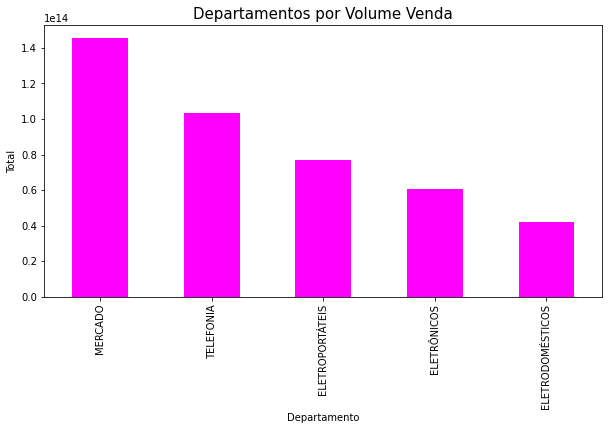

In [20]:
ranking_vv['Volume Venda'].plot.bar(color = 'Magenta', figsize = (10, 5))
plt.title('Departamentos por Volume Venda', fontsize = 15)
plt.ylabel('Total')
plt.show()

### Custo de Parcelamento

In [21]:
ranking_cp = df.groupby(['Departamento']).sum().sort_values(by=['Custo Parcelamento'],ascending=False).head()
ranking_cp

,Receita,Pedidos,Custo Parcelamento,Volume Venda
Departamento,,,,
TELEFONIA,8.460592e+09,5.621116e+06,2.114819e+07,1.032166e+14
ELETRÔNICOS,7.195411e+09,4.198404e+06,1.832542e+07,6.075917e+13
ELETRODOMÉSTICOS,6.567299e+09,4.588685e+06,1.686709e+07,4.189741e+13
ELETROPORTÁTEIS,4.081881e+09,1.443810e+07,9.392704e+06,7.713975e+13
PCS,3.054686e+09,9.498262e+05,7.150589e+06,3.436355e+12


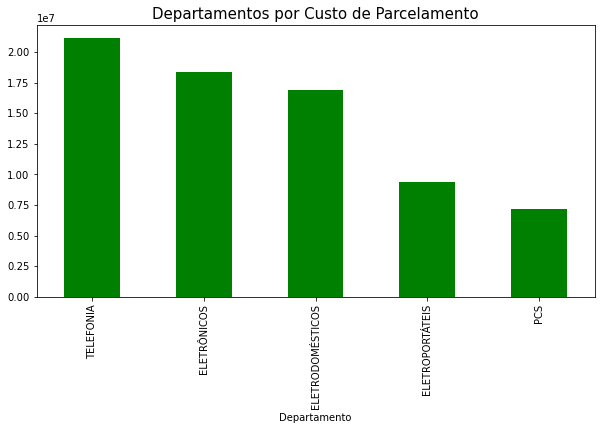

In [22]:
ranking_cp['Custo Parcelamento'].plot.bar(color = 'Green', figsize = (10, 5))
plt.title('Departamentos por Custo de Parcelamento', fontsize = 15)
plt.ylabel('')
plt.show()

### Agrupando por Departamento e Data

In [23]:
'''
#Desvio Padrão Departamento 
list_aux = df['Departamento'].unique()
dp_data = df.groupby(['Departamento','Mês/Ano']).sum()
lista = []
for i in list_aux:
    lista.append([i,dp_data.loc[i]['Pedidos'].std()])
'''

"\n#Desvio Padrão Departamento \nlist_aux = df['Departamento'].unique()\ndp_data = df.groupby(['Departamento','Mês/Ano']).sum()\nlista = []\nfor i in list_aux:\n    lista.append([i,dp_data.loc[i]['Pedidos'].std()])\n"

In [24]:
#df_desvio = pd.DataFrame(lista,columns = ['Departamento','STD Pedidos'])

In [25]:
#ranking_std = df_desvio.sort_values('STD Pedidos').head().set_index('Departamento')
#ranking_std

In [26]:
#ranking_std['STD Pedidos'].plot.bar( color = 'purple', figsize = (10, 5))
#plt.title('Desvio Padrão dos Pedidos por Departamento  ', fontsize = 15)
#plt.ylabel('')
#plt.show()

In [27]:
df.to_csv('basevendas.csv', encoding = 'utf-8', index = False)
#df.to_csv('desviopadraoDepartamento.csv', encoding = 'utf-8', index = False)

# Base visita

In [28]:
df_visita = pd.read_excel("CaseAmericanas.xlsx", sheet_name = "Base Visita")

In [29]:
df_visita.head()

,Ano,Mês,Departamento,Canal,Marca,Origem Tráfego,Visita
0,2022,2,PCS,1P,ACOM,TRAFEGO DIRETO,413050.638642
1,2020,5,PCS,1P,ACOM,COMPARADORES,121072.142917
2,2021,6,PCS,3P,SOUB,BUSCA PPC,66.738084
3,2021,11,PCS,3P,SUBA,BUSCA PPC,157287.094374
4,2020,6,PCS,1P,SHOP,BUSCA PPC,111225.893580


In [30]:
df_visita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337 entries, 0 to 17336
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ano             17337 non-null  int64  
 1   Mês             17337 non-null  int64  
 2   Departamento    17337 non-null  object 
 3   Canal           17337 non-null  object 
 4   Marca           17337 non-null  object 
 5   Origem Tráfego  17337 non-null  object 
 6   Visita          17337 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 948.2+ KB


In [31]:
df_visita['Ano'] = df_visita['Ano'].astype(str)
df_visita['Mês'] = df_visita['Mês'].astype(str)

In [32]:
df_visita.isnull().sum()

Ano               0
Mês               0
Departamento      0
Canal             0
Marca             0
Origem Tráfego    0
Visita            0
dtype: int64

In [33]:
df_visita['Mês/Ano'] = df_visita['Mês'].str.cat(df_visita['Ano'],sep="/")
df_visita.drop(["Ano", "Mês"], axis=1, inplace=True)
#df_visita['Mês/Ano'] = list(map(lambda x:datetime.strptime(x, "%m/%Y").date(),df_visita['Mês/Ano']))

In [34]:
df_visita['Departamento'].unique()

array(['PCS', 'PCs', 'MERCADO', 'PC GAMER', 'TELEFONIA', 'AUTOMOTIVO',
       'PERFUMARIA', 'ELETRONICOS', 'CLIMATIZAÇÃO', 'ESPORTE & LAZER',
       'CONSOLES & GAMES', 'ELETRODOMESTICOS', 'ELETROPORTÃ\x81TEIS',
       'BELEZA & PERFUMARIA', 'INSTRUMENTOS MUSICAIS',
       'UTILIDADES DOMESTICAS', 'INFORMÁTICA E ACESSÓRIOS', 'MÓVEIS'],
      dtype=object)

In [35]:
#Corrigindo Ortografia dos Departamentos
aux = df_visita.index[df_visita.Departamento==df_visita['Departamento'].unique()[1]]
df_visita.loc[aux,'Departamento'] = 'PCS'

In [36]:
df_visita['Departamento'].unique()

array(['PCS', 'MERCADO', 'PC GAMER', 'TELEFONIA', 'AUTOMOTIVO',
       'PERFUMARIA', 'ELETRONICOS', 'CLIMATIZAÇÃO', 'ESPORTE & LAZER',
       'CONSOLES & GAMES', 'ELETRODOMESTICOS', 'ELETROPORTÃ\x81TEIS',
       'BELEZA & PERFUMARIA', 'INSTRUMENTOS MUSICAIS',
       'UTILIDADES DOMESTICAS', 'INFORMÁTICA E ACESSÓRIOS', 'MÓVEIS'],
      dtype=object)

In [37]:
aux = df_visita.index[df_visita.Departamento==df_visita['Departamento'].unique()[6]]
df_visita.loc[aux,'Departamento'] = 'ELETRÔNICOS'
aux = df_visita.index[df_visita.Departamento==df_visita['Departamento'].unique()[10]]
df_visita.loc[aux,'Departamento'] = 'ELETRODOMÉSTICOS'
aux = df_visita.index[df_visita.Departamento==df_visita['Departamento'].unique()[11]]
df_visita.loc[aux,'Departamento'] = 'ELETROPORTÁTEIS'
aux = df_visita.index[df_visita.Departamento==df_visita['Departamento'].unique()[14]]
df_visita.loc[aux,'Departamento'] = 'UTILIDADES DOMÉSTICAS'

In [38]:
df_visita['Departamento'].unique()

array(['PCS', 'MERCADO', 'PC GAMER', 'TELEFONIA', 'AUTOMOTIVO',
       'PERFUMARIA', 'ELETRÔNICOS', 'CLIMATIZAÇÃO', 'ESPORTE & LAZER',
       'CONSOLES & GAMES', 'ELETRODOMÉSTICOS', 'ELETROPORTÁTEIS',
       'BELEZA & PERFUMARIA', 'INSTRUMENTOS MUSICAIS',
       'UTILIDADES DOMÉSTICAS', 'INFORMÁTICA E ACESSÓRIOS', 'MÓVEIS'],
      dtype=object)

In [39]:
ranking_tf = df_visita.groupby(['Departamento']).sum().sort_values(by=['Visita'],ascending=False).head()
ranking_tf

,Visita
Departamento,
ELETROPORTÁTEIS,4.088487e+08
UTILIDADES DOMÉSTICAS,3.110695e+08
TELEFONIA,2.761262e+08
ELETRODOMÉSTICOS,2.428339e+08
MERCADO,2.383047e+08


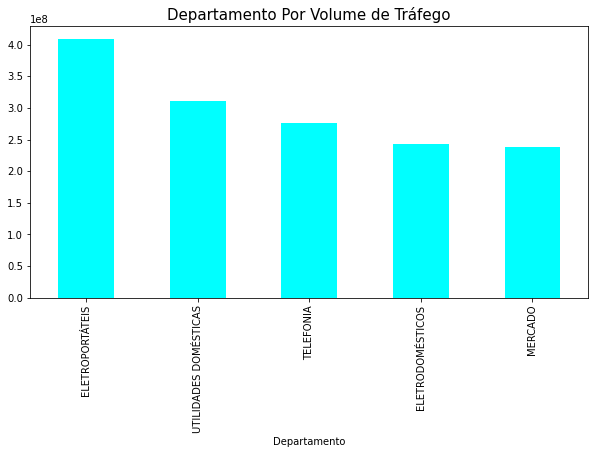

In [40]:
ranking_tf['Visita'].plot.bar( color = 'aqua', figsize = (10, 5))
plt.title('Departamento Por Volume de Tráfego', fontsize = 15)
plt.ylabel('')
plt.show()

In [41]:
df_visita.to_csv('basevisitas.csv', encoding = 'utf-8', index = False)

### Base Ad Cost

In [42]:
df_ad = pd.read_excel("CaseAmericanas.xlsx", sheet_name = "Base Ad Cost",usecols='A:G')

In [43]:
df_ad.head()

,Ano,Mês,Canal,Departamento,AFILIADOS,BUSCA PPC,COMPARADORES
0,2020,1,1P,TELEFONIA,-0.004998,-0.010845,-0.002934
1,2020,1,1P,ELETRODOMESTICOS,-0.004225,-0.014733,-0.004474
2,2020,1,1P,ELETRONICOS,-0.006406,-0.016894,-0.005469
3,2020,1,1P,PCS,-0.003451,-0.010866,-0.005582
4,2020,1,1P,CLIMATIZAÇÃO,-0.002771,-0.006624,-0.002892


In [44]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ano           868 non-null    int64  
 1   Mês           868 non-null    int64  
 2   Canal         868 non-null    object 
 3   Departamento  868 non-null    object 
 4   AFILIADOS     868 non-null    float64
 5   BUSCA PPC     868 non-null    float64
 6   COMPARADORES  868 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 47.6+ KB


In [45]:
df_ad['Ano'] = df_ad['Ano'].astype(str)
df_ad['Mês'] = df_ad['Mês'].astype(str)
df_ad['Mês/Ano'] = df_ad['Mês'].str.cat(df_ad['Ano'],sep="/")
#df_ad['Mês/Ano'] = list(map(lambda x:datetime.strptime(x, "%m/%Y").date(),df_ad['Mês/Ano']))
df_ad.drop(["Ano", "Mês"], axis=1, inplace=True)

In [46]:
df_ad['Departamento'].unique()

array(['TELEFONIA', 'ELETRODOMESTICOS', 'ELETRONICOS', 'PCS',
       'CLIMATIZAÇÃO', 'ELETROPORTÃ\x81TEIS', 'INFORMÁTICA E ACESSÓRIOS',
       'UTILIDADES DOMESTICAS', 'AUTOMOTIVO', 'CONSOLES & GAMES',
       'ESPORTE & LAZER', 'PC GAMER', 'BELEZA & PERFUMARIA', 'MÓVEIS',
       'INSTRUMENTOS MUSICAIS', 'MERCADO'], dtype=object)

In [47]:
aux = df_ad.index[df_ad.Departamento==df_ad['Departamento'].unique()[1]]
df_ad.loc[aux,'Departamento'] = 'ELETRODOMÉSTICOS'

aux = df_ad.index[df_ad.Departamento==df_ad['Departamento'].unique()[2]]
df_ad.loc[aux,'Departamento'] = 'ELETRÔNICOS'

aux = df_ad.index[df_ad.Departamento==df_ad['Departamento'].unique()[5]]
df_ad.loc[aux,'Departamento'] = 'ELETROPORTÁTEIS'

aux = df_ad.index[df_ad.Departamento==df_ad['Departamento'].unique()[7]]
df_ad.loc[aux,'Departamento'] = 'UTILIDADES DOMÉSTICAS'

In [48]:
df_ad['Departamento'].unique()

array(['TELEFONIA', 'ELETRODOMÉSTICOS', 'ELETRÔNICOS', 'PCS',
       'CLIMATIZAÇÃO', 'ELETROPORTÁTEIS', 'INFORMÁTICA E ACESSÓRIOS',
       'UTILIDADES DOMÉSTICAS', 'AUTOMOTIVO', 'CONSOLES & GAMES',
       'ESPORTE & LAZER', 'PC GAMER', 'BELEZA & PERFUMARIA', 'MÓVEIS',
       'INSTRUMENTOS MUSICAIS', 'MERCADO'], dtype=object)

In [49]:
df_ad["CAT"] = df_ad.iloc[:,2:5].sum(axis = 1)

In [50]:
df_ad.head()

,Canal,Departamento,AFILIADOS,BUSCA PPC,COMPARADORES,Mês/Ano,CAT
0,1P,TELEFONIA,-0.004998,-0.010845,-0.002934,1/2020,-0.018777
1,1P,ELETRODOMÉSTICOS,-0.004225,-0.014733,-0.004474,1/2020,-0.023431
2,1P,ELETRÔNICOS,-0.006406,-0.016894,-0.005469,1/2020,-0.028769
3,1P,PCS,-0.003451,-0.010866,-0.005582,1/2020,-0.019900
4,1P,CLIMATIZAÇÃO,-0.002771,-0.006624,-0.002892,1/2020,-0.012287


In [51]:
ranking_ad = df_ad.groupby(['Departamento']).sum().sort_values(by=['CAT'],ascending = False).tail()
ranking_ad

,AFILIADOS,BUSCA PPC,COMPARADORES,CAT
Departamento,,,,
UTILIDADES DOMÉSTICAS,-0.327877,-1.814818,-0.093306,-2.236000
CONSOLES & GAMES,-0.997999,-1.298379,-0.165031,-2.461409
INFORMÁTICA E ACESSÓRIOS,-0.405142,-1.986944,-0.237897,-2.629983
AUTOMOTIVO,-0.219760,-2.341187,-0.121456,-2.682403
PC GAMER,-0.559008,-1.944633,-0.214705,-2.718346


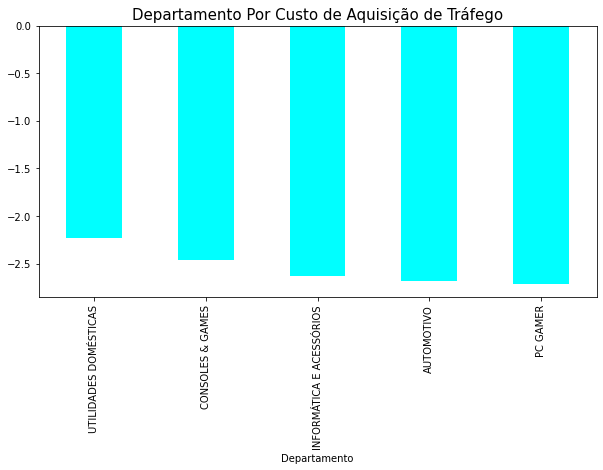

In [52]:
ranking_ad['CAT'].plot.bar( color = 'aqua', figsize = (10, 5))
plt.title('Departamento Por Custo de Aquisição de Tráfego', fontsize = 15)
plt.ylabel('')
plt.show()

In [53]:
df_ad.to_csv('baseadCost.csv', encoding = 'utf-8', index = False)

In [59]:
df_mercado = df[df.Departamento=="MERCADO"].copy()
df_mercado.drop(['Departamento'], axis=1, inplace=True)

In [60]:
df_mercado

,Canal,Marca,Origem Tráfego,MDP,Parcelamento,Receita,Pedidos,Mês/Ano,Custo Parcelamento,Volume Venda
64754,3P,ACOM,BUSCA PPC,AME,A VISTA,5.697485e+05,3983.256299,9/2020,0.000000,2.269454e+09
64755,1P,ACOM,TRAFEGO DIRETO,PIX,A VISTA,1.448811e+06,39880.373945,10/2021,0.000000,5.777913e+10
64756,3P,SUBA,TRAFEGO DIRETO,AME,A VISTA,8.944835e+04,669.073494,12/2020,0.000000,5.984752e+07
64757,3P,ACOM,TRAFEGO DIRETO,BOLETO,A VISTA,1.235274e+05,917.269307,4/2022,0.000000,1.133079e+08
64758,1P,ACOM,BUSCA ORGANICA,CARTAO,A VISTA,6.339383e+04,1564.373135,2/2020,0.000000,9.917161e+07
...,...,...,...,...,...,...,...,...,...,...
68756,1P,SUBA,BUSCA PPC,CARTAO,A VISTA,1.042309e+03,15.609970,12/2021,0.000000,1.627041e+04
68757,3P,SOUB,TRAFEGO DIRETO,CARTAO,A PRAZO,8.661580e+02,4.409949,4/2022,4.330790,3.819712e+03
68758,1P,SUBA,BUSCA PPC,CARTAO,A PRAZO,1.664725e+03,14.048973,12/2021,8.323626,2.338768e+04
68759,3P,SHOP,AFILIADOS,BOLETO,A VISTA,6.086310e+03,61.615981,1/2021,0.000000,3.750140e+05


In [61]:
df_mercado.to_csv('vendasMercado.csv', encoding = 'utf-8', index = False)